## Bibliotecas a utilizar

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtención del archivo

In [3]:
df_Base = pd.read_excel('http://www2.ssn.gob.ar/files/Archivos/C_Companias_Productores/07_info_est_y_contable/info_est_contable/indicadores/2018_06_Indicadores%20-%202018-2%20-%20Anexo%20web.xls',
                              sheet_name='1 Indicadores Patrimoniales',skiprows=3, header=1, index_col=0 )
df_Base.head(1)

,NJ,Denominación,% Producción Total,Cantidad de Juicios,% (Créditos/ Activos),% [(Dispon.+ Invers.) / Deudas c/Aseg.],% [(Dispon.+ Invers. + Inmuebles) / Deudas c/Aseg.],% [(Dispon.+ Invers.+ Inmueb.) / (Deudas c/Aseg.+ Comp.Técn.)],% (Inversiones + Inmuebles) / Activos,% Superávit / Capital Requerido,[(Dispon.+ Invers.) / Compromisos Exigibles]
Nº,,,,,,,,,,,
NaN,NaN,Total de Mercado,100.0,568605.0,19.094323,209.762,212.745,124.859,77.072237,76.1372,30.757


In [45]:
df_Base.dtypes

NJ                                                                   object
Denominación                                                         object
%\nProducción\nTotal                                                float64
Cantidad\nde\nJuicios                                               float64
%\n(Créditos/\nActivos)                                             float64
%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]                            object
%\n[(Dispon.+ Invers. + Inmuebles) /\nDeudas c/Aseg.]                object
%\n[(Dispon.+ Invers.+ Inmueb.) /\n(Deudas c/Aseg.+ Comp.Técn.)]     object
% \n(Inversiones + Inmuebles) /\nActivos                            float64
%\nSuperávit /\nCapital Requerido                                    object
[(Dispon.+ Invers.) /\nCompromisos Exigibles]                        object
dtype: object

# Información del archivo

### Índices Generales
- **A. Primas y Recargos emitidos en cada entidad / Primas y Recargos Emitidos en Total del Mercado**  
Indica el tamaño de la entidad en relación a la producción total del mercado en %

- **B. Cantidad de Juicios en Trámite**  
Indica cifras absolutas, las mediciones y demandas judiciales entabladas y en tramitación contra cada aseguradora  

### Índices Patrimoñales
- **C. Créditos / Activo**  
Proporción de Activo compuesta por importes adeudados a la entidad de asegurados, reaseguradores,  coaseguradores y cuentas a cobrar o créditos a favor en (%)

- **D. (Disponibilidad + Inversiones) / Deudas con Asegurados**  
Capacidad de respuesta de la aseguradora con sus bienes líquidos y cuasi líquidos, ante siniestros pendiente de pago y posibles reclamos de asegurados y terceros (en %)

- **D'. (Disponibilidad + Inversiones + Inmuebles) / Deudas con Asegurados**  
Capacidad de respuesta con sus bienes liquidos, cuasiliquidos e inmueblres ante siniestros pendientes de pago y posibles relcamos de asegurados y terceros (en %).  
No se consideran los inmuebles de uso propio

- **E. (Disponibilidad + Inversiones + Inmuebles) / Deudas con Asegurados + Compromisos Técnicos**  
Representa la cobertura con que cuenta la aseguradora para afrontar riesgos y obligaciones con asegurados y terceros damnificados (en %) Incluye inmuebles de uso propio

- **F. (Inversiones + Inmuebles) / Activos**  
Expresa la parte proporcional del activo compuesta por inversiones e inmuebles destinados a renta o venta (Capital Invertido) (en %)  

### Índices de Solvencia
- **G. Superávit / Capital Requerido**  
Indica el excedente de capital acreditado por la aseguradora, con relación al capital requerido por las normas vigentes (en %)
- **G. (Disponibilidades + Inversiones) / Compromisos Exigibles**  
Capacidad de respuesta de la seguradora con sus bienes de inmediata disponibilidad, ante el posible reclamo de deudas y compromsisos vencidos (cantidad de veces) en base a datos publicados en estado de cobertura de compromisos exigibles y siniestros liquidados a pagar.  
  
  
**//     Valor porcentual superior a las tres cifras.  
///    Indicador no disponible debido a la naturaleza del cálculo: divisor nulo o negativo.**

## Creando los DataFrames
* Selección de columnas
* Partición por ramos

In [6]:
todas_columnas = df_Base.columns.values.tolist()
columnas_deseadas = ['Denominación',
                     '%\nProducción\nTotal',
                     '%\n(Créditos/\nActivos)',
                     '%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]',
                     '%\n[(Dispon.+ Invers. + Inmuebles) /\nDeudas c/Aseg.]',
                     '%\n[(Dispon.+ Invers.+ Inmueb.) /\n(Deudas c/Aseg.+ Comp.Técn.)]',
                     '% \n(Inversiones + Inmuebles) /\nActivos',
                     '%\nSuperávit /\nCapital Requerido',
                     '[(Dispon.+ Invers.) /\nCompromisos Exigibles]']

df_Pat = df_Base[6:127][columnas_deseadas]              # Seguros Patrimoñales
df_ART = df_Base[128:141][columnas_deseadas]            # Seguros ART
df_TPub = df_Base[142:147][columnas_deseadas]           # Seguros Transporte Público
df_Vida = df_Base[148:182][columnas_deseadas]           # Seguros Vida
df_Retiro = df_Base[183:199][columnas_deseadas]         # Seguros Retiro

df_Pat.head(2)

,Denominación,% Producción Total,% (Créditos/ Activos),% [(Dispon.+ Invers.) / Deudas c/Aseg.],% [(Dispon.+ Invers. + Inmuebles) / Deudas c/Aseg.],% [(Dispon.+ Invers.+ Inmueb.) / (Deudas c/Aseg.+ Comp.Técn.)],% (Inversiones + Inmuebles) / Activos,% Superávit / Capital Requerido,[(Dispon.+ Invers.) / Compromisos Exigibles]
Nº,,,,,,,,,
1,AFIANZADORA,0.086878,48.554167,402.667,402.667,181.036,46.774304,78.3161,///
2,AGROSALTA,0.085777,66.764600,178.077,178.077,155.611,30.899752,294.113,80.6708


In [52]:
df_ART = df_ART.replace('//',0)
df_ART = df_ART.replace('///',0)
df_ART

,Denominación,% Producción Total,% (Créditos/ Activos),% [(Dispon.+ Invers.) / Deudas c/Aseg.],% [(Dispon.+ Invers. + Inmuebles) / Deudas c/Aseg.],% [(Dispon.+ Invers.+ Inmueb.) / (Deudas c/Aseg.+ Comp.Técn.)],% (Inversiones + Inmuebles) / Activos,% Superávit / Capital Requerido,[(Dispon.+ Invers.) / Compromisos Exigibles]
Nº,,,,,,,,,
1,ASOCIART ART,2.404716,6.716666,123.659607,123.659607,116.932102,92.070193,3.589956,56.582875
2,BERKLEY ART,0.410142,6.776976,292.023033,292.023033,285.725608,92.644404,988.110009,21.601592
3,CAMINOS PROTEGIDOS ART,0.048576,28.738973,62.980663,62.980663,55.146051,70.818099,-393.351444,27.903630
4,EXPERTA ART,3.189957,4.464721,132.598637,133.411104,120.401965,94.649059,67.536998,51.689564
5,GALENO ART,3.435319,5.308799,125.973164,125.973164,119.323434,93.255693,1.101087,38.513951
6,LIDERAR ART,0.135259,23.255022,84.446870,84.446870,84.446870,76.389688,-340.145485,0.000000
7,MUTUAL PETROLEROS ART,0.002675,0.365593,0.000000,0.000000,806.167662,97.390115,14.901394,488.121092
8,OMINT ART,0.571353,7.379505,130.273935,130.273935,116.460586,89.088142,7.771078,24.805445
9,PREVENCIÓN ART,5.634341,5.494918,139.374419,139.395007,129.634490,89.702182,40.072997,17.530549


### Relación % del mercado y capacidad de respuesta con bienes liquidos y cuasi liquidos

In [109]:
df_Mercado_Respuesta = df_ART[:][['Denominación','%\nProducción\nTotal','%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]']]

vmART = df_Mercado_Respuesta['%\nProducción\nTotal'].sum()

df_Mercado_Respuesta['% Mercado ART'] = df_Mercado_Respuesta['%\nProducción\nTotal']*100/vmART

Text(0.5, 0, '% de capacidad de respuesta')

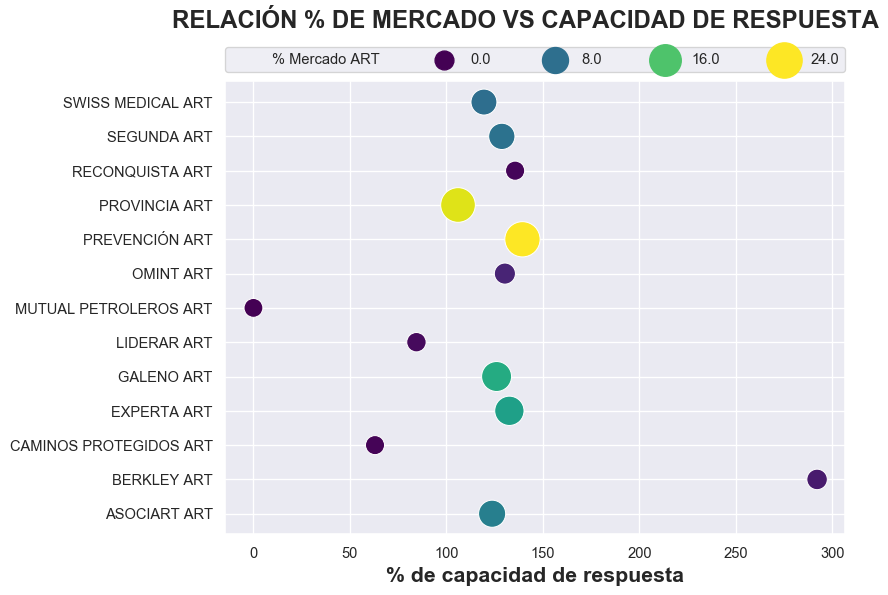

In [169]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(800/96,600/96),dpi=96)
ax = sns.scatterplot(x = '%\n[(Dispon.+ Invers.) /\nDeudas c/Aseg.]', 
                y = 'Denominación',
                size = '% Mercado ART',
                sizes = (200,700),
                hue = '% Mercado ART',
                data = df_Mercado_Respuesta,
                palette = 'viridis',
                )
plt.suptitle('RELACIÓN % DE MERCADO VS CAPACIDAD DE RESPUESTA', 
             fontsize=18, fontweight='bold', y = 1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
           loc='lower left', ncol=5, 
           mode="expand", borderaxespad=0.)
plt.ylabel('')
plt.xlabel('% de capacidad de respuesta', fontsize=16,fontweight='bold')



Para este análisis se tomaron en cuenta los siguientes datos:
- **A. Porcentaje del Mercado de ART**  
Porcentaje del mercado que tiene tomado dicha compañía. 

- **D. (Disponibilidad + Inversiones) / Deudas con Asegurados**  
Capacidad de respuesta de la aseguradora con sus bienes líquidos y cuasi líquidos, ante siniestros pendiente de pago y posibles reclamos de asegurados y terceros (en %)  
  
Esto demuestra que sin importar el tamaño del mercado que posea la compañía, la mayoría comparte un porcentaje de capacidad de respuesta de entre el 100% al 150%.  
Esto denota un mercado sano, y a su vez deja ver rápidamente cuales son las compañìas que están fuera de esto como:
* Mutual Petroleros
* Caminos Protegidos ART
* Liderar ART

### Relación % del mercado y superávit